In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df = pd.read_csv(r"C:\Users\megal\Downloads\archive (1)\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#droping cabin column, because it has more than 50% nul values
df = df.drop(columns = ['Cabin'])

In [5]:
#calculating median age for each gender
age = df.groupby('Sex')['Age'].median()

#filling null values in the age column based on gender
df['Age'] = df.apply(
    lambda x:age[x['Sex']] if pd.isnull(x['Age']) else x['Age'],axis = 1
)

In [6]:
#imputing null values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
#getting the statistical parameter
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerID --> Mean and Median are equal, indicating that the distribution is symmetric
Srvived --> Mean is greater than median, so that the distribution is right-skewed
Pclass --> Mean is Less than median, so that the distribution is left-skewed
Age --> Mean is greater than median, so that the distribution is right-skewed
SibSp --> Mean is greater than median, so that the distribution is right-skewed
Parch --> Mean is greater than median, so that the distribution is right-skewed
Fare --> Mean is greater than median, so that the distribution is right-skewed

In the age column, it indicates that people's ages range from 4 months to 80 years.

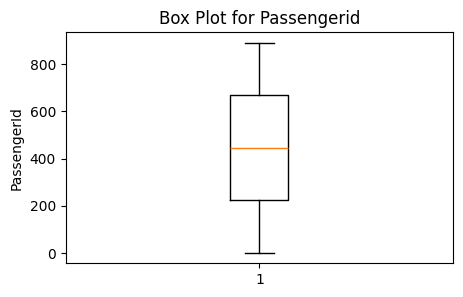

In [12]:
plt.figure(figsize=(5,3))
plt.boxplot(df['PassengerId'])
plt.title('Box Plot for Passengerid')
plt.ylabel('PassengerId')
plt.show()

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df1 = df.drop(columns = ['Name','Sex','Ticket','Embarked'],axis = 0)

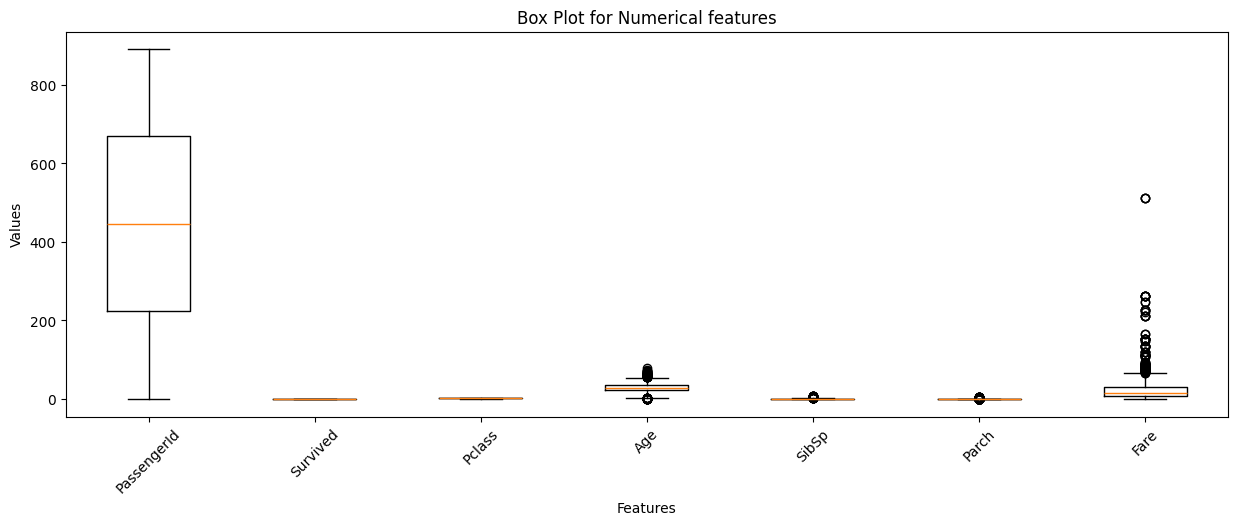

In [22]:
plt.figure(figsize = (15,5))
plt.boxplot(df1.values)
plt.title('Box Plot for Numerical features')
plt.xticks(ticks=range(1, len(df1.columns) + 1), labels=df1.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

The plot indicates that the variables passengerid, survived, and pclass have no outliers, while sibsp and parch exhibit a few outliers. In contrast, age and fare contain a significant number of outliers. If we remove these outliers, it is likely that nearly half of the data will be eliminated.

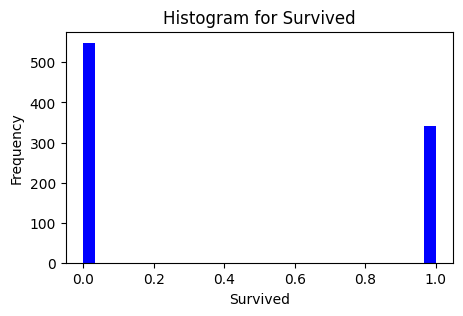

In [43]:
plt.figure(figsize = (5,3))
plt.hist(df1['Survived'],bins = 30,color = 'blue')
plt.title('Histogram for Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

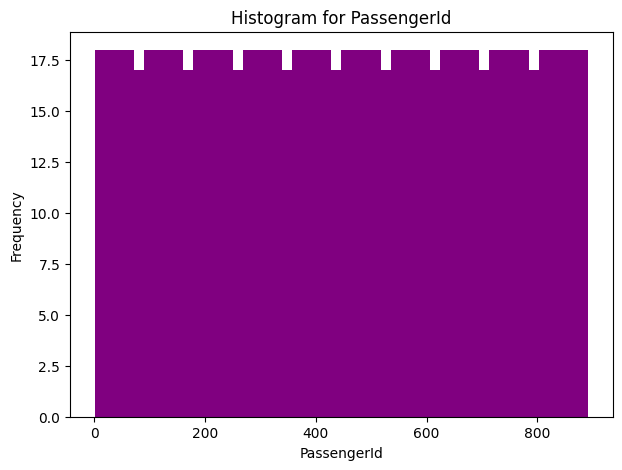

In [50]:
plt.figure(figsize = (7,5))
plt.hist(df1['PassengerId'],bins = 50,color = 'purple')
plt.title('Histogram for PassengerId')
plt.xlabel('PassengerId')
plt.ylabel('Frequency')
plt.show()

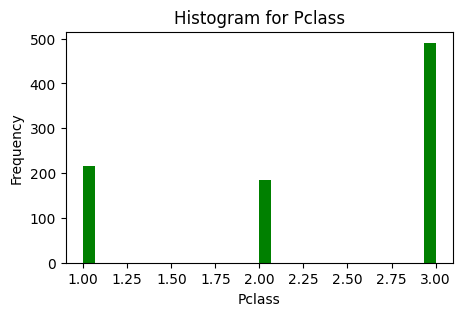

In [51]:
plt.figure(figsize = (5,3))
plt.hist(df1['Pclass'],bins = 30,color = 'green')
plt.title('Histogram for Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

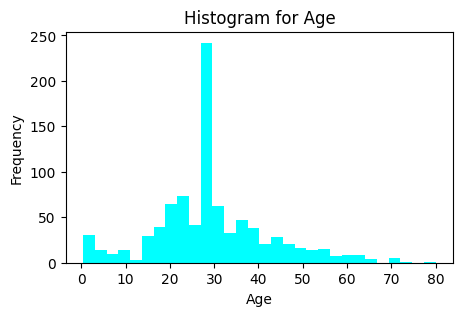

In [52]:
plt.figure(figsize = (5,3))
plt.hist(df1['Age'],bins = 30,color = 'cyan')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

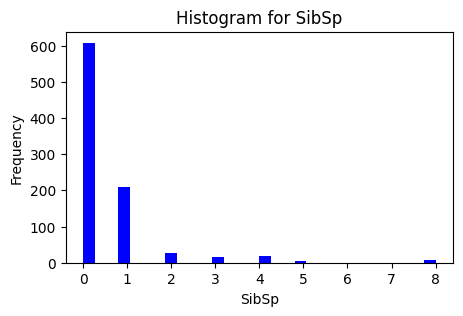

In [53]:
plt.figure(figsize = (5,3))
plt.hist(df1['SibSp'],bins = 30,color = 'blue')
plt.title('Histogram for SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.show()

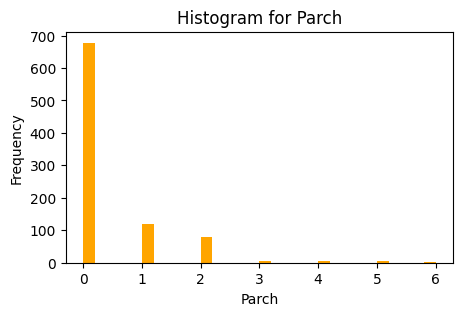

In [56]:
plt.figure(figsize = (5,3))
plt.hist(df1['Parch'],bins = 30,color = 'orange')
plt.title('Histogram for Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.show()

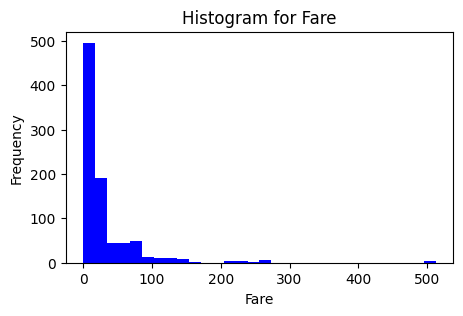

In [55]:
plt.figure(figsize = (5,3))
plt.hist(df1['Fare'],bins = 30,color = 'blue')
plt.title('Histogram for Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

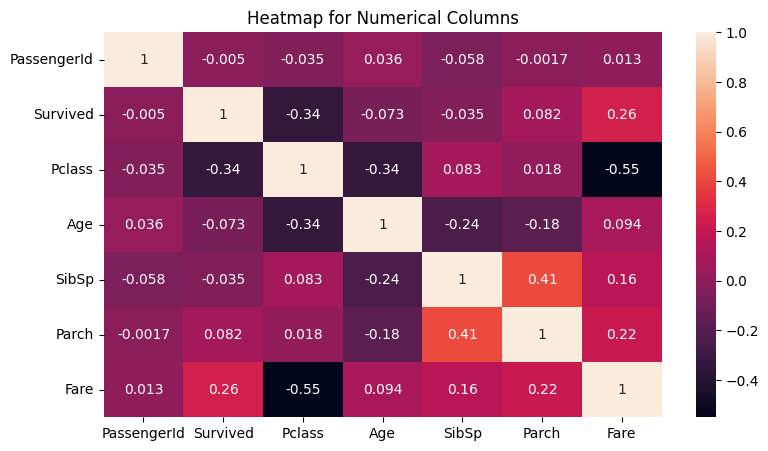

In [ ]:
#Mulitcollinearity test (Pearson's Correlation Coefficient)
plt.figure(figsize = (9,5))
sns.heatmap(df1.corr(),annot = True)
plt.title('Heatmap for Numerical Columns')
plt.show()

Conclusion from the heatmap:

Pclass has a moderate negative relationship with the target variable (Survived).
Fare, Parch, Sibsp, Age, and PassengerId exhibit weak correlations (or no correlation) with the target variable.
Pclass has a moderate negative relationship with Fare.
Parch has a moderate positive correlation with Sibsp.

In [ ]:
# Connecting to MySQL
mydb = pymysql.connect(
    host='localhost',
    user='root',
    password='Sanjana@2003'
)


In [ ]:
try:
    mycursor = mydb.cursor()
    mycursor.execute("CREATE DATABASE IF NOT EXISTS titanic2")
    mycursor.execute("USE titanic2")
    
    mycursor.execute("""
    CREATE TABLE IF NOT EXISTS titanic2 (
        PassengerId INT,
        Survived INT,
        Pclass INT,
        Name VARCHAR(100),
        Sex varchar(10),
        Age FLOAT,
        SibSp INT,
        Parch INT,
        Ticket VARCHAR(50),
        Fare FLOAT,
        Embarked VARCHAR(10)
    )
    """)
    
    values = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']].values.tolist()
    
    mycursor.executemany("""
    INSERT INTO titanic2 (
        PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, values)
    
    mydb.commit()

except pymysql.MySQLError as e:
    print(f"Error occurred: {e}")
finally:
    mycursor.close()
    mydb.close()